# <u>Module 0</u> - Pandas 

[Pandas](https://pandas.pydata.org/) is an open-source data manipulation and analysis library for Python. It provides data structures for efficiently storing and manipulating large datasets, as well as tools for reading and writing various data formats. Pandas is widely used in data science, machine learning, and other fields where data analysis is a crucial part of the workflow.

In [29]:
import sys
import subprocess
import pkg_resources

# Find out which packages are missing.
installed_packages = {dist.key for dist in pkg_resources.working_set}
required_packages = {'pandas', 'openpyxl'}
missing_packages = required_packages - installed_packages

# If there are missing packages install them.
if missing_packages:
    print('Installing the following packages: ' + str(missing_packages))
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing_packages], stdout=subprocess.DEVNULL)

Now, download the examples.

In [30]:
import os

# Check if the data directory already exists.
if not os.path.exists("example.csv"):
    # URL of the zip data file to download.
    url = "https://github.com/PacktPublishing/Machine-Learning-Techniques-for-Text/raw/main/module-00/pandas-example.zip"

    # If it doesn't exist, download the zip file.
    !wget {url}

    # Unzip the file into the "data" folder.
    !unzip -q "pandas-example.zip"

## 1. Installing Pandas
You can install Pandas using the following command:

`pip install pandas`

## 2. Importing Pandas
After installation, you can import Pandas into your Python script or Jupyter Notebook:

In [31]:
import pandas as pd

## 3. Pandas Data Structures
Pandas introduces two main data structures: __Series__ and __DataFrame__.

### 3.1. Series
A one-dimensional array with an index, similar to a column in a spreadsheet.

In [32]:
# Creating a Series from a list.
s = pd.Series([1, 3, 5, 6, 8])
s

0    1
1    3
2    5
3    6
4    8
dtype: int64

### 3.2. DataFrame
A two-dimensional table with rows and columns, similar to a spreadsheet or SQL table.

In [33]:
# Creating a DataFrame from a dictionary.
data = {'Name': ['John', 'Alice', 'Bob'],
        'Age': [28, 24, 22],
        'City': ['New York', 'San Francisco', 'Seattle']}
df = pd.DataFrame(data)
df

,Name,Age,City
0,John,28,New York
1,Alice,24,San Francisco
2,Bob,22,Seattle


## 4. Reading and Writing Data
Pandas supports reading and writing data in various formats, including CSV, Excel, SQL, and more.

### 4.1. Reading Data

In [34]:
# Reading from a CSV file.
df_csv = pd.read_csv('example.csv')
df_csv

,ID,Name,Salary
0,1,Alice,50000
1,2,Bob,60000
2,3,Charlie,70000


In [35]:
# Reading from an Excel file.
df_excel = pd.read_excel('example.xlsx')
df_excel

,ID,Name,Salary
0,1,Alice,50000
1,2,Bob,60000
2,3,Charlie,70000


### 4.2. Writing Data

In [36]:
# Writing to a CSV file.
df.to_csv('output.csv', index=False)

# Writing to an Excel file.
df.to_excel('output.xlsx', index=False)

## 5. Data Exploration and Manipulation
Pandas provides a wide range of functions for exploring and manipulating data.

### 5.1. Exploring Data

In [37]:
# Displaying the first few rows of a DataFrame.
df.head()

,Name,Age,City
0,John,28,New York
1,Alice,24,San Francisco
2,Bob,22,Seattle


In [38]:
# Summary statistics.
df.describe()

,Age
count,3.000000
mean,24.666667
std,3.055050
min,22.000000
25%,23.000000
50%,24.000000
75%,26.000000
max,28.000000


In [39]:
# Information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


### 5.2. Data Manipulation

In [40]:
# Selecting columns.
df['Name']

0     John
1    Alice
2      Bob
Name: Name, dtype: object

In [41]:
# Filtering data.
df[df['Age'] > 25]

,Name,Age,City
0,John,28,New York


In [42]:
# Sorting by a column.
df.sort_values(by='Age')

,Name,Age,City
2,Bob,22,Seattle
1,Alice,24,San Francisco
0,John,28,New York


## 6. Handling Missing Data
Pandas provides methods for handling missing or NaN values in your data.

In [43]:
# Removing rows with missing values.
df.dropna()

# Filling missing values with a specific value.
df.fillna(value=0)

,Name,Age,City
0,John,28,New York
1,Alice,24,San Francisco
2,Bob,22,Seattle


## 7. Grouping and Aggregation
Pandas allows you to group data based on certain criteria and perform aggregations.

In [44]:
# Grouping by a column and calculating the mean.
df.groupby('City')['Age'].mean()

City
New York         28.0
San Francisco    24.0
Seattle          22.0
Name: Age, dtype: float64

## 8. Merging and Concatenating DataFrames
You can combine multiple DataFrames using merging or concatenation.

In [45]:
# Creating the first DataFrame (df1)
data1 = {'ID': [1, 2, 3],
         'Name': ['Alice', 'Bob', 'Charlie']}
df1 = pd.DataFrame(data1)

# Creating the second DataFrame (df2)
data2 = {'ID': [1, 2, 3],
         'Salary': [50000, 60000, 70000]}
df2 = pd.DataFrame(data2)

# Merging DataFrames.
result = pd.merge(df1, df2, on='ID')
result

,ID,Name,Salary
0,1,Alice,50000
1,2,Bob,60000
2,3,Charlie,70000


In [46]:
# Concatenating DataFrames.
result = pd.concat([df1, df2])
result

,ID,Name,Salary
0,1,Alice,NaN
1,2,Bob,NaN
2,3,Charlie,NaN
0,1,NaN,50000.0
1,2,NaN,60000.0
2,3,NaN,70000.0


## 9. Time Series Analysis
Pandas supports time series data, making it convenient for analyzing temporal datasets.

In [47]:
# Creating a DateTimeIndex.
date_rng = pd.date_range(start='2022-01-01', end='2022-01-10', freq='D')
date_rng

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

In [48]:
# Creating a time series DataFrame.
time_series_df = pd.DataFrame(date_rng, columns=['date'])
time_series_df

,date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
5,2022-01-06
6,2022-01-07
7,2022-01-08
8,2022-01-09
9,2022-01-10


## 10. Visualization with Pandas
Pandas integrates with Matplotlib for basic data visualization.

<AxesSubplot:xlabel='Age', ylabel='Salary'>

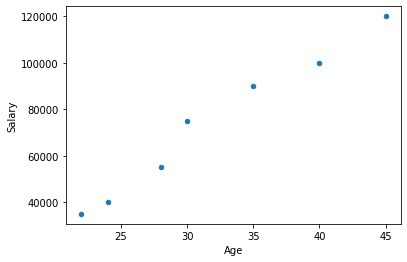

In [49]:
data = {'Age': [28, 24, 22, 30, 35, 40, 45],
        'Salary': [55000, 40000, 35000, 75000, 90000, 100000, 120000]}

df = pd.DataFrame(data)

# Plotting a DataFrame.
df.plot(x='Age', y='Salary', kind='scatter')

Pandas is a versatile and powerful library for data manipulation and analysis in Python. Whether you're working with small or large datasets, Pandas provides a convenient and efficient way to handle, explore, and analyze your data. Understanding Pandas is essential for anyone involved in data-related tasks in Python.

## What we have learned …

| |
| --- |
| **Pandas** |
| |

## Author Information

- **Author:** Nikos Tsourakis
- **Email:** nikos@tsourakis.net
- **Website:** [tsourakis.net](https://tsourakis.net)
- **Date:** November 20, 2023